# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [28]:
library(tidyverse)
library(scales)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
vacc <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  index = col_double(),
  state = col_character(),
  year = col_character(),
  name = col_character(),
  type = col_character(),
  city = col_character(),
  county = col_character(),
  district = col_logical(),
  enroll = col_double(),
  mmr = col_double(),
  overall = col_double(),
  xrel = col_logical(),
  xmed = col_double(),
  xper = col_double(),
  lat = col_double(),
  lng = col_double()
)




In [48]:
vacc%>% head

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [16]:
df_vacc_rates = vacc%>%
filter(mmr >= 0)%>%
group_by(state)%>%
summarize(rates_above_95 = sum(mmr>95, na.rm=TRUE)/n())

df_vacc_rates


state,rates_above_95
<chr>,<dbl>
Arizona,0.496157131
Arkansas,0.003527337
California,0.730966608
Colorado,0.621101526
Connecticut,0.806451613
Illinois,0.896304970
Maine,0.459383754
Massachusetts,0.816561845
Minnesota,0.467671061


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [18]:
df_vacc_rates %>% arrange(rates_above_95)

#Arkansas has the smallest fraction of schools above the CDC target vaccination rate of 95%

state,rates_above_95
<chr>,<dbl>
Arkansas,0.003527337
Washington,0.317997978
North Dakota,0.455555556
Maine,0.459383754
Minnesota,0.467671061
Ohio,0.483727304
Arizona,0.496157131
Missouri,0.580000000
Oregon,0.590570720


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [46]:
ecdf = vacc %>%
    filter(state == "North Carolina")%>%
    filter(overall>=0)%>%
    arrange(overall) %>%
    mutate(rn = row_number(), fraction_of_schools = rn / n())%>%
    select(overall, state, fraction_of_schools)
ecdf

overall,state,fraction_of_schools
<dbl>,<chr>,<dbl>
21.7,North Carolina,0.0004798464
40.3,North Carolina,0.0009596929
42.9,North Carolina,0.0014395393
43.5,North Carolina,0.0019193858
45.0,North Carolina,0.0023992322
45.3,North Carolina,0.0028790787
46.2,North Carolina,0.0033589251
46.2,North Carolina,0.0038387716
47.4,North Carolina,0.0043186180


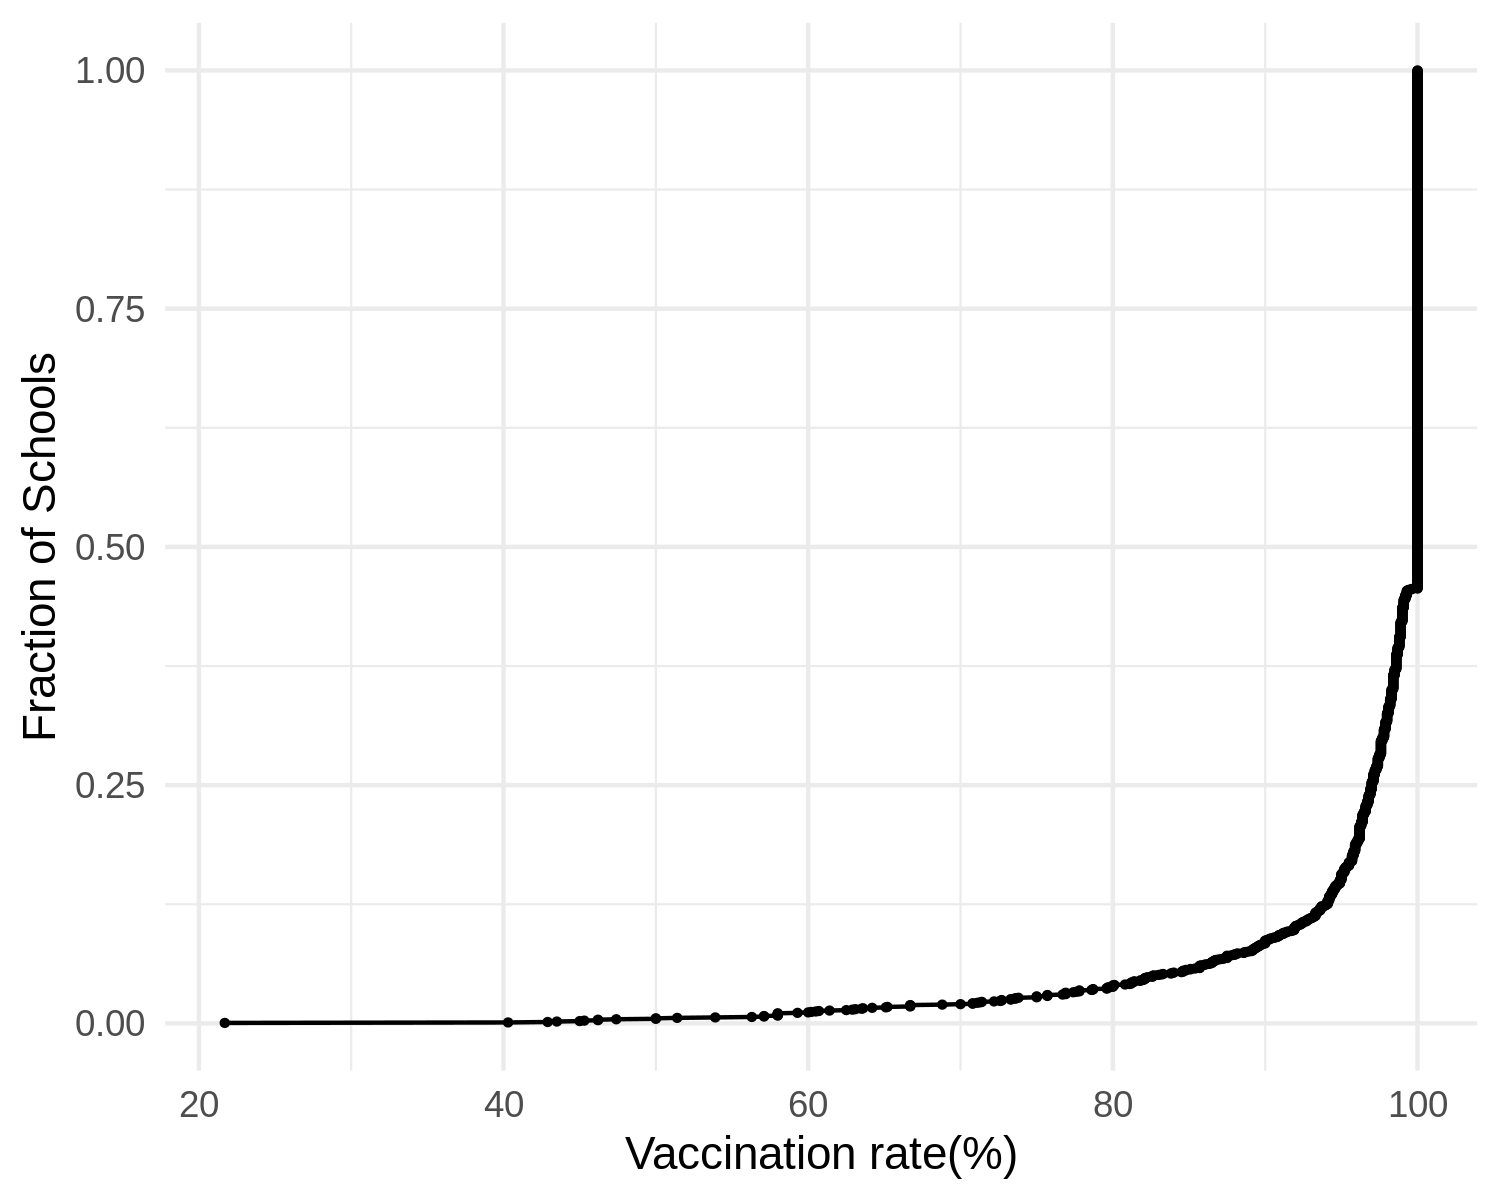

In [49]:
p = ggplot(ecdf, aes(x = overall, y = fraction_of_schools))
p = p + geom_line() + geom_point(size = 0.5) #can also use geom_step()
p = p + labs(x='Vaccination rate(%)', y = 'Fraction of Schools')
p = p + theme_minimal()
p = p + theme(legend.position="top")
p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

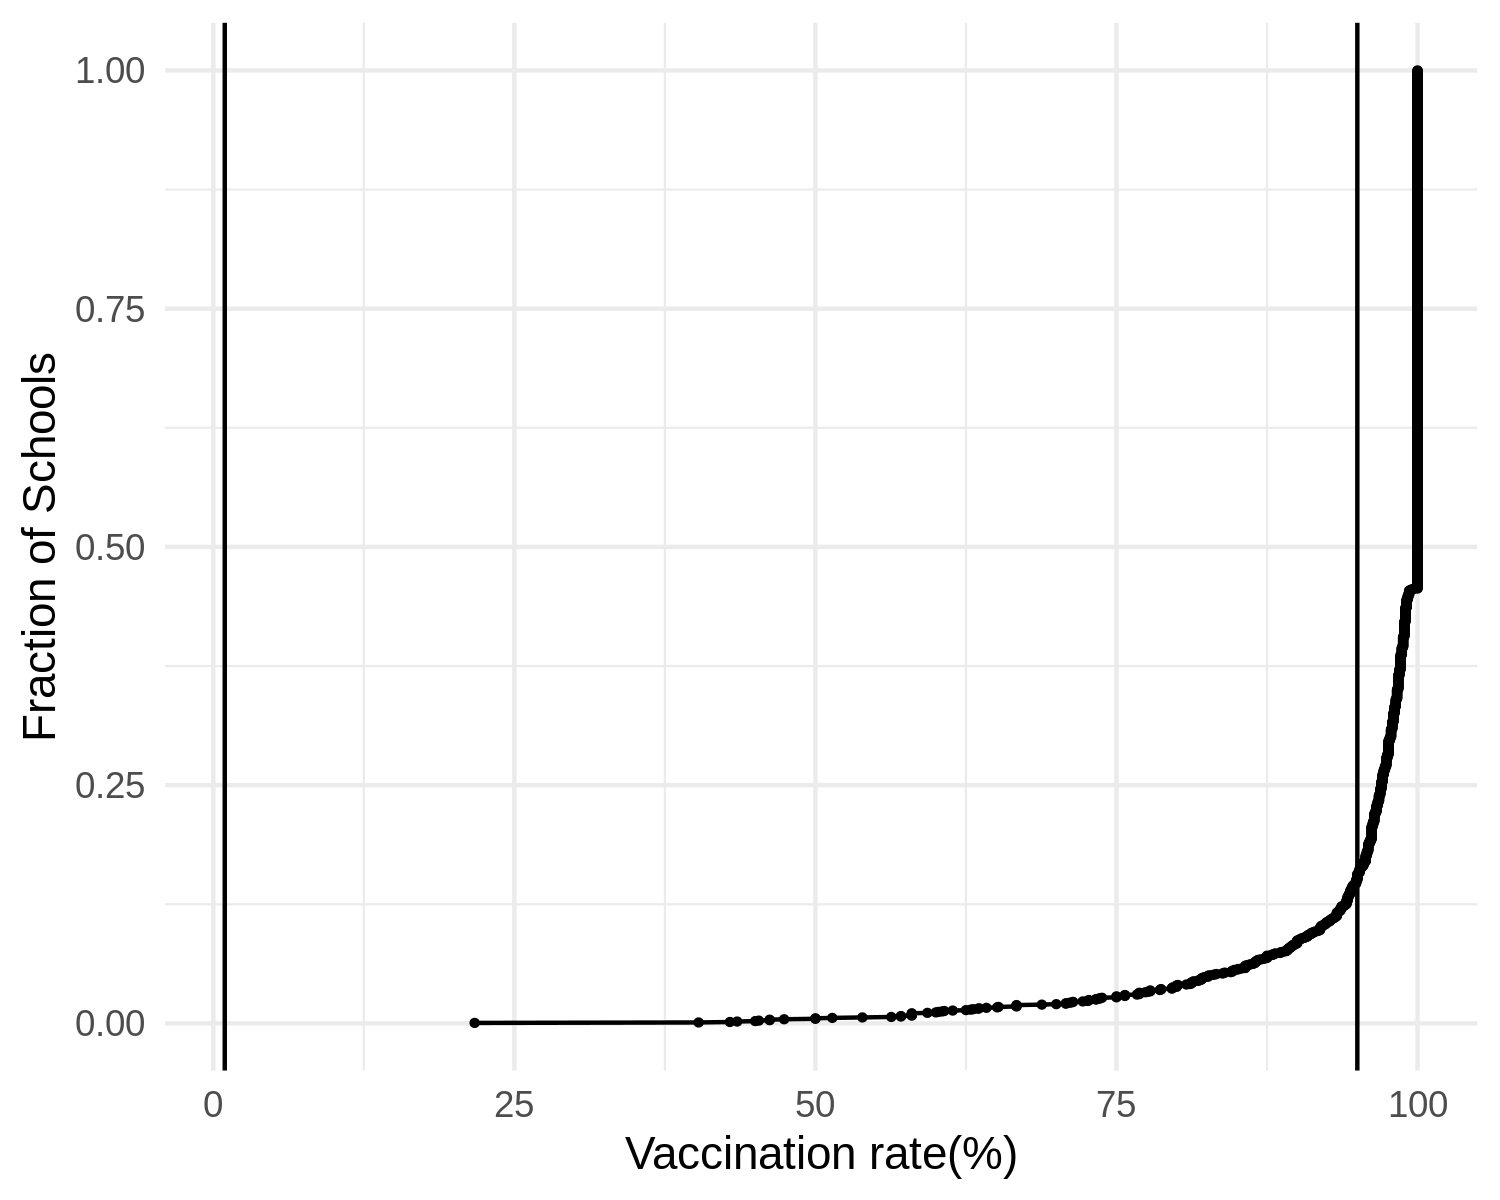

In [45]:
p = p + geom_vline(xintercept = 95)
p
#Yes